In [231]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing trained models

In [232]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from pathlib import Path

sys.path.append(str(Path(".").resolve().parent))

#### Import trained model

In [233]:
model_path_1 = Path("../manifest/models/T1.keras")

In [234]:
def load_model(path=None):
    if path == None:
        print("specify path first")
        return
    return keras.models.load_model(path, compile=True)

In [235]:
model = load_model(model_path_1)

#### Import training data

In [236]:
import pickle
with open("../data/pickles/T1.pkl", "+br") as p_in:
    data = pickle.load(p_in)

In [237]:
data["seq_test"].shape

(113, 192, 192, 1)

In [238]:
data["seg_test"].max()

np.uint8(1)

In [239]:
predictions = model.predict(data["seq_test"])

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


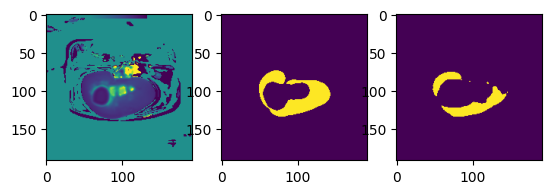

In [267]:
from random import randint
r_choice = randint(0, len(predictions)-1)

t = predictions[r_choice].max() * .90
above_t = predictions[r_choice] > t
mt = np.zeros_like(predictions[r_choice])
mt[above_t] = 1
# Plotting
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(data["seq_test"][r_choice])
axarr[1].imshow(data["seg_test"][r_choice])
axarr[2].imshow(mt)
plt.show()